In [ ]:
!pip install kaggle

In [ ]:
# Import kaggle.json from CSV FOLDER
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d omkargurav/face-mask-dataset

 99% 161M/163M [00:08<00:00, 23.8MB/s]
100% 163M/163M [00:08<00:00, 21.1MB/s]


In [ ]:
#Extract all compressed Data
from zipfile import ZipFile
dataset="/content/face-mask-dataset.zip"
with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print("Extrated")

Extrated


In [ ]:
!ls

data  face-mask-dataset.zip  kaggle.json  sample_data


In [ ]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
from PIL import Image
from sklearn.model_selection import train_test_split

In [ ]:
with_mask_files=os.listdir('/content/data/with_mask')
print(with_mask_files[0:5])

['with_mask_3193.jpg', 'with_mask_225.jpg', 'with_mask_2852.jpg', 'with_mask_3651.jpg', 'with_mask_506.jpg']


In [ ]:
len(with_mask_files)

3725

In [ ]:
without_mask_files=os.listdir('/content/data/without_mask')
print(without_mask_files[0:5])

['without_mask_1766.jpg', 'without_mask_1081.jpg', 'without_mask_1189.jpg', 'without_mask_3320.jpg', 'without_mask_1437.jpg']


In [ ]:
len(without_mask_files)

3828

##Create labels of image

In [ ]:
# With mask--->1
# without mask --->0


In [ ]:
with_mask_label=[1]*len(with_mask_files)
without_mask_label=[0]*len(without_mask_files)

In [ ]:
with_mask_label[:5]

[1, 1, 1, 1, 1]

In [ ]:
without_mask_label[:5]

[0, 0, 0, 0, 0]

In [ ]:
labels=without_mask_label+with_mask_label
print(len(labels))

7553


#DISPLAYING IMAGES

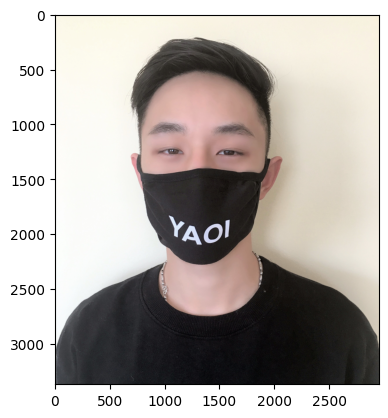

In [ ]:
# with mask image
img=mpimg.imread('/content/data/with_mask/with_mask_3194.jpg')
plt.imshow(img)
plt.show()

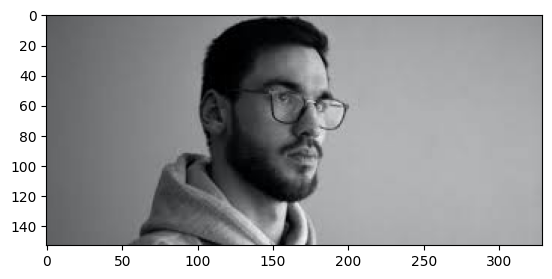

In [ ]:
img=mpimg.imread('/content/data/without_mask/without_mask_1081.jpg')
plt.imshow(img)
plt.show()

In [ ]:
#How to use Image class of PIL and convert image by resizing and np array
ad=Image.open('/content/data/without_mask/without_mask_1081.jpg')
ad=ad.resize((128,128))
ad=ad.convert('RGB')
ad=np.array(ad)
print(ad)

[[[ 90  91  93]
  [ 92  93  95]
  [ 94  95  97]
  ...
  [150 151 153]
  [149 150 152]
  [148 149 151]]

 [[ 90  91  93]
  [ 92  93  95]
  [ 94  95  97]
  ...
  [150 151 153]
  [149 150 152]
  [148 149 151]]

 [[ 91  92  94]
  [ 92  93  95]
  [ 94  95  97]
  ...
  [150 151 153]
  [149 150 152]
  [148 149 151]]

 ...

 [[ 96  97  99]
  [ 96  97  99]
  [ 98  99 101]
  ...
  [171 172 174]
  [169 170 172]
  [168 169 171]]

 [[ 96  97  99]
  [ 96  97  99]
  [ 98  99 101]
  ...
  [171 172 174]
  [169 170 172]
  [168 169 171]]

 [[ 95  96  98]
  [ 95  96  98]
  [ 96  97  99]
  ...
  [170 171 173]
  [167 168 170]
  [167 168 170]]]


#Image processing

In [ ]:
# Resize the images
# Convert the images to numpy arrays
with_mask_path='/content/data/with_mask/'
data=[]
for img_file in with_mask_files:
  image=Image.open(with_mask_path + img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)

without_mask_path='/content/data/without_mask/'

for img_file in without_mask_files:
  image=Image.open(without_mask_path + img_file)
  image=image.resize((128,128))
  image=image.convert('RGB')
  image=np.array(image)
  data.append(image)



/usr/local/lib/python3.10/dist-packages/PIL/Image.py:975: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  warnings.warn(


In [ ]:
len(data),len(labels)

(7553, 7553)

In [ ]:
type(data)

list

In [ ]:

type(data[1])

numpy.ndarray

In [ ]:
data[0].shape

(128, 128, 3)

In [ ]:
type(labels)

list

In [ ]:
#convert labels and image list to numpy array
X=np.array(data)
y=np.array(labels)

In [ ]:
X.shape

(7553, 128, 128, 3)

In [ ]:
type(X)

numpy.ndarray

In [ ]:
type(y)

numpy.ndarray

In [ ]:
y.shape

(7553,)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)


In [ ]:
print(X_train.shape,X_test.shape)

(6042, 128, 128, 3) (1511, 128, 128, 3)


In [ ]:
#Scalling the data
X_trained_scaled=X_train/255
X_test_scaled=X_test/255

In [ ]:
 X_trained_scaled[10]

array([[[0.15686275, 0.14901961, 0.10196078],
        [0.15686275, 0.14901961, 0.10196078],
        [0.16078431, 0.15294118, 0.10588235],
        ...,
        [0.15686275, 0.14509804, 0.1254902 ],
        [0.15294118, 0.14117647, 0.12156863],
        [0.15294118, 0.14117647, 0.12156863]],

       [[0.16078431, 0.15294118, 0.10588235],
        [0.16078431, 0.15294118, 0.10588235],
        [0.16078431, 0.15294118, 0.10588235],
        ...,
        [0.16078431, 0.14509804, 0.12941176],
        [0.15686275, 0.14117647, 0.1254902 ],
        [0.15294118, 0.14117647, 0.12156863]],

       [[0.16862745, 0.16078431, 0.11764706],
        [0.16862745, 0.15686275, 0.11764706],
        [0.16078431, 0.15294118, 0.10980392],
        ...,
        [0.16470588, 0.14509804, 0.12941176],
        [0.15686275, 0.14117647, 0.1254902 ],
        [0.15294118, 0.14117647, 0.12156863]],

       ...,

       [[0.07843137, 0.02745098, 0.        ],
        [0.13333333, 0.08235294, 0.02745098],
        [0.24705882, 0

#Building CNN

In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow import keras

In [ ]:
num_of_classes=2 # with mask and without mask
model=keras.Sequential()
model.add(keras.layers.Conv2D(32,kernel_size=(3,3),activation='relu',input_shape=(128,128,3)))
#Max pooling
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))
model.add(keras.layers.Conv2D(64,kernel_size=(3,3),activation='relu'))
#Max pooling
model.add(keras.layers.MaxPooling2D(pool_size=(2,2)))

#Add flatten layer
model.add(keras.layers.Flatten())

model.add(keras.layers.Dense(128,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(64,activation='relu'))
model.add(keras.layers.Dropout(0.5))

model.add(keras.layers.Dense(2,activation='sigmoid'))


In [ ]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['acc'])

In [ ]:
history=model.fit(X_trained_scaled,y_train,validation_split=0.1,epochs=5)

Epoch 1/5
170/170 [==============================] - 16s 23ms/step - loss: 0.5580 - acc: 0.7736 - val_loss: 0.3745 - val_acc: 0.8479
Epoch 2/5
170/170 [==============================] - 3s 16ms/step - loss: 0.3599 - acc: 0.8635 - val_loss: 0.2857 - val_acc: 0.8893
Epoch 3/5
170/170 [==============================] - 3s 17ms/step - loss: 0.2986 - acc: 0.8893 - val_loss: 0.2881 - val_acc: 0.8942
Epoch 4/5
170/170 [==============================] - 3s 16ms/step - loss: 0.2583 - acc: 0.9012 - val_loss: 0.3181 - val_acc: 0.9025
Epoch 5/5
170/170 [==============================] - 3s 18ms/step - loss: 0.2277 - acc: 0.9134 - val_loss: 0.2650 - val_acc: 0.9041


In [ ]:
loss,accuracy=model.evaluate(X_test_scaled,y_test)
print(accuracy)

48/48 [==============================] - 0s 10ms/step - loss: 0.2890 - acc: 0.8915
0.8914626240730286


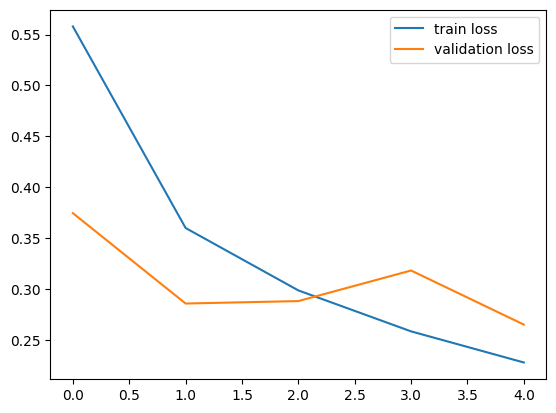

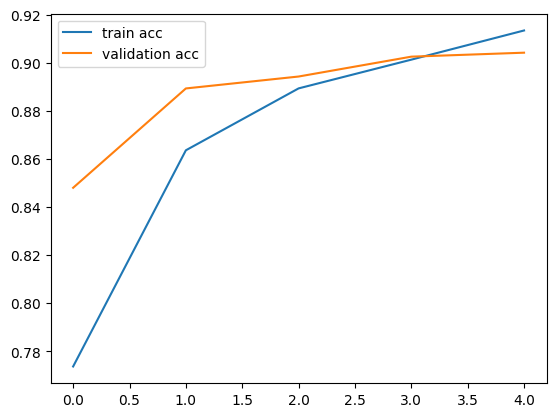

In [ ]:
h=history
plt.plot(h.history['loss'],label='train loss')
plt.plot(h.history['val_loss'],label='validation loss')
plt.legend()
plt.show()

plt.plot(h.history['acc'],label='train acc')
plt.plot(h.history['val_acc'],label='validation acc')
plt.legend()
plt.show()

path so the image to be predicted/content/data/with_mask/with_mask_3194.jpg


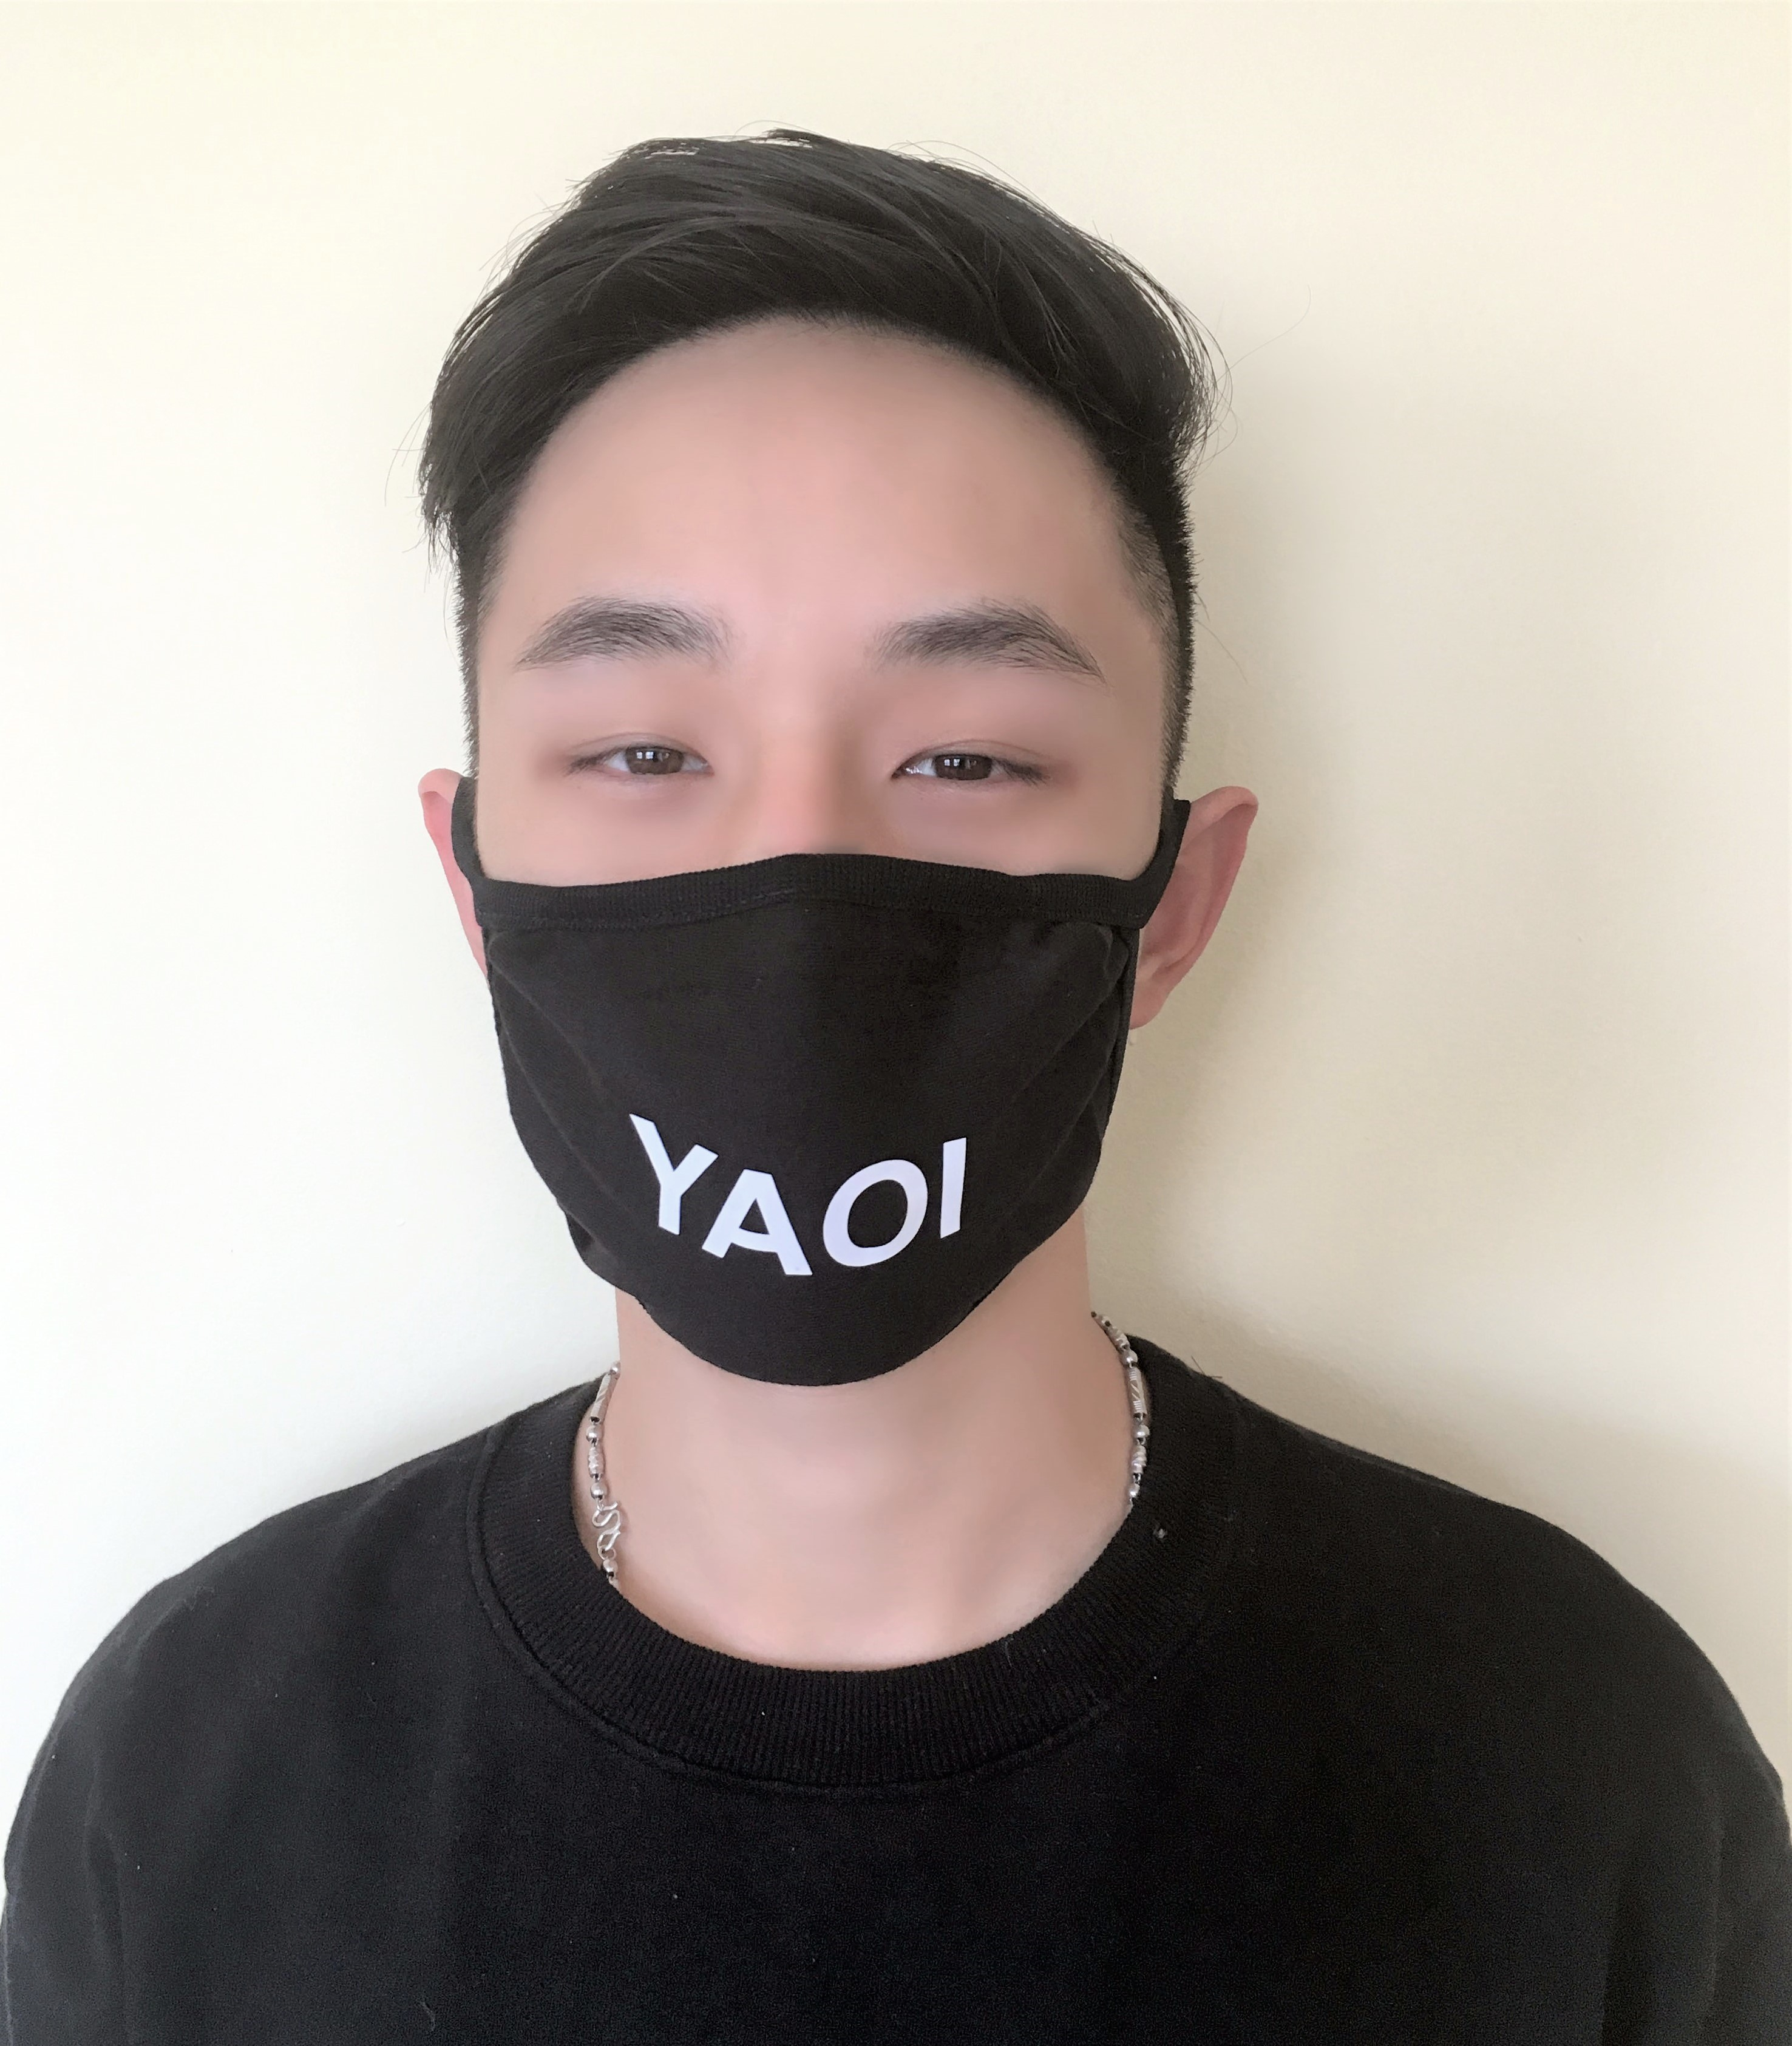

1/1 [==============================] - 0s 28ms/step
[[0.6693009 0.1633203]]
0
Not wearing a mask


In [ ]:
#Predictive System
input_image_path=input('path so the image to be predicted')
input_img=cv2.imread(input_image_path)
cv2_imshow(input_img)
input_image_resized=cv2.resize(input_img,(128,128))
input_image_scaled=input_image_resized/255
input_image_reshape=np.reshape(input_image_scaled,[1,128,128,3])
input_prediction=model.predict(input_image_reshape)
print(input_prediction)

input_prediction_label=np.argmax(input_prediction)
print(input_prediction_label)

if input_prediction_label==1:
  print("The person is wearing a mask")
else:
  print("Not wearing a mask")
